Load libraries and enable access to files published on Google Drive:

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Read the most relevant terms list and prepare auxiliar functions:



In [106]:
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from gensim.models import KeyedVectors
import multiprocessing as mp
import itertools
import random
import requests

def plot_terms(vectors, terms):
  pca = PCA(n_components=2)
  result = pca.fit_transform(vectors)
  #fig, ax = plt.subplots(figsize=(20, 15))
  #ax.scatter(result[:, 0], result[:, 1], s=100, c='lightblue')
  #for i, word in enumerate(terms):
  #    ax.annotate(word, xy=(result[i, 0], result[i, 1]))
  x = result[:, 0]
  y = result[:, 1]
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))  # 1 row, 2 columns
  ax1.scatter(x, y, c='lightblue')
  for i, word in enumerate(terms):
    ax1.annotate(word, xy=(result[i, 0], result[i, 1]))
  heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
  extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
  ax2.imshow(heatmap.T, extent=extent, origin='lower')
  #plt.tight_layout()  # Optional ... often improves the layout


def vectorize(model,texts):
  print("getting topic distributions..")
  vectors = []
  for text in texts:
    req_data = {'text': text, 'topics': True}
    x = requests.post(model, json = req_data)
    vectors.append(x.json()['vector'])
  return vectors

users_id="1Oq0pDd2liXvnio-J8Ci520bTZHrH05Bb"
users_downloaded = drive.CreateFile({'id':users_id}) 
users_downloaded.GetContentFile('terms.txt')  

freq_file=open('terms.txt','r')
terms=freq_file.read().rstrip().lstrip().split('\n')
terms=[tuple(map(str, t[1:-1].split(','))) for t in terms ]
#terms=[(float(t[0]),t[1]) for t in terms]
terms=[t[1].replace("'","").strip() for t in terms[:20]]
print(terms)

['human influenza virus infection', 'virus infection progression 2', '1 human mast cells', 'virus within epithelial cells', 'viral nonstructural protein 2', 'human immunodeficiency virus 1', 'two protein structures using', '1 cells 10 times', '4 cells using sars', 'kill virus infected cells', 'virus infected cells', 'respiratory viral infection data', 'protein load within cells', '1 infected cells', 'influenza virus fusion protein', '2 0 1 6', 'hiv 1 target cells', 'virus using one', 'infected cells using microscopy', 'using laboratory b cells']


# Dengue Disease

getting topic distributions..


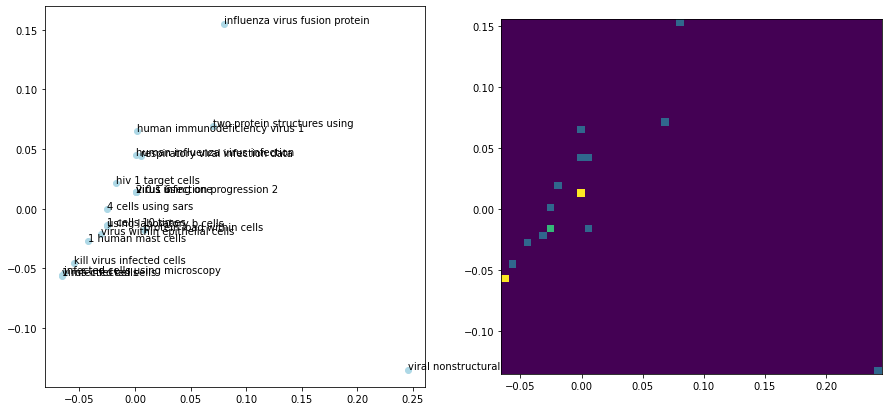

In [107]:
model = vectorize("https://librairy.linkeddata.es/dengue-disease-model/inferences", terms)
plot_terms(model,terms)

# Malaria Disease

getting topic distributions..


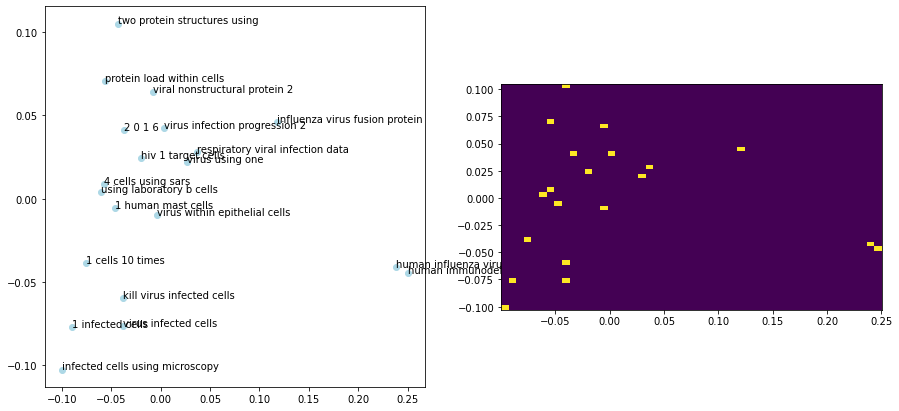

In [108]:
model = vectorize("https://librairy.linkeddata.es/malaria-disease-model/inferences", terms)
plot_terms(model,terms)

# Covid-19 Disease

getting topic distributions..


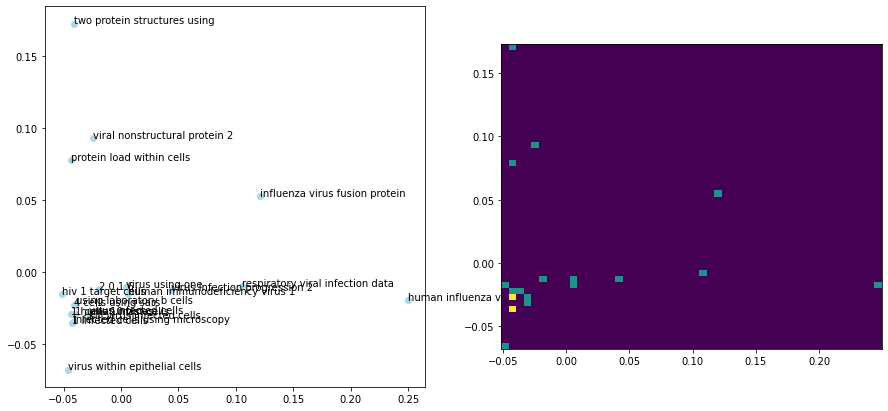

In [109]:
model = vectorize("https://librairy.linkeddata.es/covid19-disease-model/inferences", terms)
plot_terms(model,terms)